**Author**: Chaorong Chen (c.chen@uci.edu)

**Content**: This Jupyter notebook demonstrates briefly how to use MESA to analyze various types of features/datasets, build a single modality, and integrate the results of the single modality into a multimodality. In this case, we generated two datasets at random for demonstration purposes, all with identical sample labels. The results showed that multimodality outperformed single-modality by taking informatic features from both single-modalities.


# Import


In [2]:
from MESA_util import *
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

In [3]:
def plot_ROC(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, label="AUC=" + str(auc))
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend(loc=4)
    plt.show()


# Create random datasets for testing


In [4]:
dataset1, label = make_classification(
    n_samples=20,
    n_features=50,
    n_informative=30,
    n_redundant=5,
    random_state=0,
    shuffle=False,
)

dataset2, label_ = make_classification(
    n_samples=20,
    n_features=40,
    n_informative=20,
    n_redundant=5,
    random_state=0,
    shuffle=False,
)

In [5]:
dataset1 = pd.DataFrame(
    dataset1,
    columns=["feature_1_" + str(_) for _ in range(50)],
    index=[("Cancer" if _ == 1 else "Normal") for _ in label],
).T
dataset2 = pd.DataFrame(
    dataset2,
    columns=["feature_2_" + str(_) for _ in range(40)],
    index=[("Cancer" if _ == 1 else "Normal") for _ in label],
).T

In [6]:
dataset1.head()

,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer
feature_1_0,-2.657438,0.250462,-6.316733,-0.183008,-3.157091,-0.373797,-1.271039,-1.655216,2.316599,-2.708390,-3.514962,-0.636650,-2.301711,-0.555753,3.657662,0.797684,-1.345706,-4.046547,0.323794,5.727181
feature_1_1,-4.047969,0.059135,12.176013,2.180394,-1.959148,7.983654,4.252196,-4.331032,3.810289,0.977776,-0.197668,7.882415,4.299040,-2.233456,1.555099,-1.260301,5.317385,0.997258,4.693458,1.638596
feature_1_2,0.336807,2.574391,1.643657,2.056295,-2.111729,-3.422055,-1.489284,-0.688571,-0.449130,-1.067020,-0.043363,-0.856425,-1.341088,1.084733,6.465461,1.609761,2.851012,6.886433,-5.484811,0.894754
feature_1_3,2.617077,1.375779,2.223775,1.451959,1.754885,4.093960,3.859569,0.435443,4.673766,1.010637,2.421923,5.816843,-3.427341,-5.362654,0.817183,-0.067298,-6.467959,-6.892887,-1.956304,0.193378
feature_1_4,-8.929103,5.587176,-1.891227,7.925671,0.886867,3.427853,8.519712,-3.558961,1.644851,-0.283583,1.569537,0.003211,-1.846819,1.642075,-5.320329,-0.843546,-5.943937,-3.330491,-0.213274,4.349994


In [7]:
dataset2.head()

,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer
feature_2_0,-0.602556,3.643032,3.037892,-1.109481,2.385997,-5.984252,-2.916217,1.923783,-0.342886,-0.208612,1.133495,0.177237,0.658569,0.143992,-2.691958,-2.962459,1.106371,-0.519772,-2.737600,2.896222
feature_2_1,5.912015,4.584149,0.131728,-2.882158,5.968676,2.285868,-0.926496,1.840909,-0.130376,-1.320260,3.914576,-1.048612,5.839853,2.979434,2.506142,-0.443105,1.252658,-1.382861,-4.003773,-3.995266
feature_2_2,-3.712827,2.349710,-1.674970,6.494007,-0.958747,-4.429147,-2.819524,-1.717120,-0.549012,-0.380938,-2.246815,2.602718,-1.787210,2.916498,3.777609,-0.087982,0.793247,-4.773273,-0.976853,-3.822507
feature_2_3,-0.249867,-2.310414,0.478615,0.945218,-2.274545,1.600593,-2.064119,1.653003,1.510509,0.423255,-1.516784,-1.658048,-1.392895,-1.889464,1.077493,3.039729,-7.109191,-1.954977,4.625182,-3.502716
feature_2_4,-2.576757,3.888342,2.090072,-3.132203,-2.847686,-1.642812,2.669854,-2.681256,1.341412,5.071602,-1.507957,3.669974,-2.416891,4.494471,4.878578,0.287927,-0.834164,2.106695,-0.603902,0.547497


# Run MESA


## Single modality


In [8]:
random_state = 0

In [10]:
# Construct single modalities
mesa_result_1 = MESA_single(
    X=dataset1,
    y=label,
    boruta_est=RandomForestClassifier(random_state=random_state, n_jobs=-1),
    cv=LeaveOneOut(),
    classifiers=[
        RandomForestClassifier(random_state=random_state, n_jobs=-1),
        LogisticRegression(random_state=random_state, n_jobs=-1),
    ],
    random_state=random_state,
    boruta_top_n_feature=10,
    variance_threshold=0,
    missing_ratio=1,
    normalization=False,
)

mesa_result_2 = MESA_single(
    X=dataset2,
    y=label,
    boruta_est=RandomForestClassifier(random_state=random_state, n_jobs=-1),
    cv=LeaveOneOut(),
    classifiers=[
        RandomForestClassifier(random_state=random_state, n_jobs=-1),
        LogisticRegression(random_state=random_state, n_jobs=-1),
    ],
    random_state=random_state,
    boruta_top_n_feature=10,
    variance_threshold=0,
    missing_ratio=1,
    normalization=False,
)


=============== No. 1  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 2  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 3  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 4  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 5  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 6  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 7  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 8  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 9  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No. 10  LOO iteration ===============
VarianceThreshold(0): 0/50 features filtered
=============== No.

In [204]:
# AUC
mesa_single_summary_1 = MESA_summary(mesa_result_1, 2)
mesa_single_summary_2 = MESA_summary(mesa_result_2, 2)
print(
    "AUC of dataset 1 [Random Forest, Logistic Regression]: %s"
    % mesa_single_summary_1[-1]
)
print(
    "AUC of dataset 2 [Random Forest, Logistic Regression]: %s"
    % mesa_single_summary_2[-1]
)


AUC of dataset 1 [Random Forest, Logistic Regression]: [0.67, 0.6499999999999999]
AUC of dataset 2 [Random Forest, Logistic Regression]: [0.45999999999999996, 0.6699999999999999]


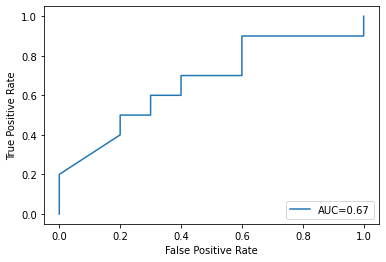

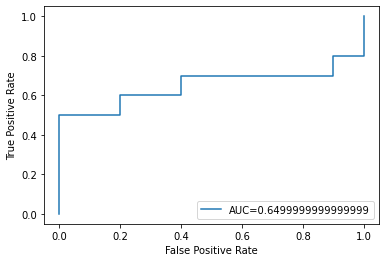

In [205]:
# ROC curve for RandomForest classifier
plot_ROC(mesa_single_summary_1[0], mesa_single_summary_1[1][0])
# ROC curve for Logistic Regresion classifier
plot_ROC(mesa_single_summary_1[0], mesa_single_summary_1[1][1])

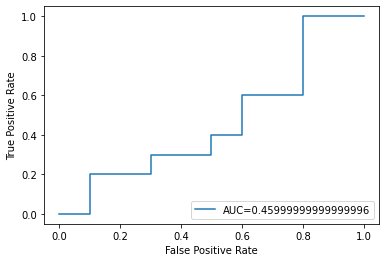

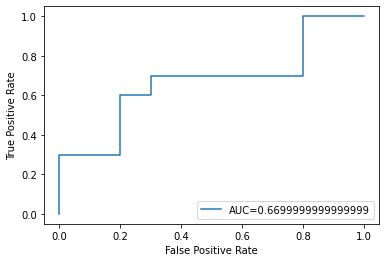

In [206]:
# ROC curve for RandomForest classifier
plot_ROC(mesa_single_summary_2[0], mesa_single_summary_2[1][0])
# ROC curve for Logistic Regression classifier
plot_ROC(mesa_single_summary_2[0], mesa_single_summary_2[1][1])

## Multimodality


In [209]:
mesa_multimodal = MESA_integration(
    X_list=[dataset1, dataset2],
    y=label,
    cv=LeaveOneOut(),
    missing_ratio=1,
    normalization=False,
    estimator_list=[
        LogisticRegression(random_state=random_state, n_jobs=-1),
        LogisticRegression(random_state=random_state, n_jobs=-1),
    ],
    random_state=0,
    meta_estimator=LogisticRegression(random_state=random_state, n_jobs=-1),
    feature_selected=[mesa_result_1[0], mesa_result_2[0]],
)


In [210]:
mesa_integration_summary = MESA_integration_summary(mesa_multimodal)
print("AUC of multimodal integration: %s" % mesa_integration_summary[-1]) # @ Modified time: 2023-02-11 03:00:14 # @ Modified by: Chaorong Chen

AUC of multimodal integration: 0.78


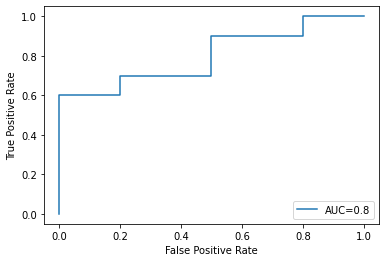

In [121]:
# ROC curve for SVM classifier
plot_ROC(mesa_integration_summary[0], mesa_integration_summary[1])


## Let's plot them together


We can see that the prediction accuaracy/AUC increased dramatically as it took informatic features from both datasets after integration(Logistic Regression(LR) as base estimator for example)


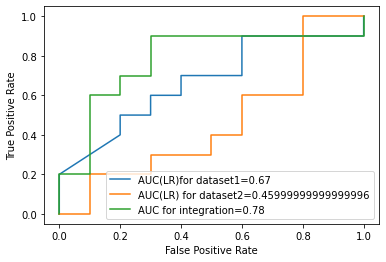

In [213]:
fpr, tpr, _ = roc_curve(mesa_single_summary_1[0], mesa_single_summary_1[1][0])
auc = roc_auc_score(mesa_single_summary_1[0], mesa_single_summary_1[1][0])
plt.plot(fpr, tpr, label="AUC(LR)for dataset1=" + str(auc))

fpr, tpr, _ = roc_curve(mesa_single_summary_2[0], mesa_single_summary_2[1][0])
auc = roc_auc_score(mesa_single_summary_2[0], mesa_single_summary_2[1][0])
plt.plot(fpr, tpr, label="AUC(LR) for dataset2=" + str(auc))

fpr, tpr, _ = roc_curve(mesa_integration_summary[0], mesa_integration_summary[1])
auc = roc_auc_score(mesa_integration_summary[0], mesa_integration_summary[1])
plt.plot(fpr, tpr, label="AUC for integration=" + str(auc))

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()
